In [2]:
import math 
import sys 
sys.path.append("../../")
from utils.util_fk import *
from utils.util import * 
print("Done.")

/home/sangbeom/.pyenv/versions/3.8.8/envs/mujoco/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-09-19 00:03:54,070	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Done.


### Calibration 

In [3]:
# Calibration
rotation_x   = Rotation_X(-math.pi)
rotation_y   = Rotation_Y(-math.pi/4)
rotation_mat = np.dot(rotation_x, rotation_y)
position_mat = Translation(0.454,0,1.3)
transform_mat= HT_matrix(rotation_mat, position_mat)
print("transform_mat:\n", transform_mat)

transform_mat:
 [[ 7.07106781e-01  0.00000000e+00 -7.07106781e-01  4.54000000e-01]
 [ 8.65956056e-17 -1.00000000e+00  8.65956056e-17  0.00000000e+00]
 [-7.07106781e-01 -1.22464680e-16 -7.07106781e-01  1.30000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [4]:
position = np.array([0.5,0,-0.3]) # Example position for Apriltag
points = np.append(position, 1)
mat = np.dot(transform_mat, points)
t_mat = mat.T
xyz = t_mat[0:3]
print("xyz:\n", xyz)

xyz:
 [1.01968542e+00 1.73191211e-17 1.15857864e+00]


In [16]:
eye_mat = np.eye(4)

print("eye_mat:\n", eye_mat)

rotation_y   = Rotation_Y(np.deg2rad(90))
print("rotation_y:\n", rotation_y)

change_mat = np.dot(eye_mat, rotation_y)
print("change_mat:\n", change_mat)

rpy = r2rpy(change_mat[:3,:3])
print("rpy:\n", rpy)

eye_mat:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
transform_mat:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
rotation_y:
 [[ 6.123234e-17  0.000000e+00  1.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]]
change_mat:
 [[ 6.123234e-17  0.000000e+00  1.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]]
rpy:
 [0.         1.57079633 0.        ]


In [25]:
# Calibration
rotation_x   = Rotation_X(-math.pi)
rotation_y   = Rotation_Y(-math.pi/4)
rotation_mat = np.dot(rotation_x, rotation_y)
position_mat = Translation(0.454,0,1.3)
transform_mat= HT_matrix(rotation_mat, position_mat)
print("transform_mat:\n", transform_mat)
test_mat     = pr2t(np.array([0,0,1]), np.eye(3))

print("test_mat:\n", test_mat)

calib_mat = np.dot(test_mat,transform_mat)
print("calib_mat:\n", calib_mat)

calib_rot_mat = t2r(calib_mat)
calib_rpy_mat = r2rpy(calib_rot_mat)
print("calib_rpy_mat:\n", np.rad2deg(calib_rpy_mat[0]), np.rad2deg(calib_rpy_mat[1]), np.rad2deg(calib_rpy_mat[2]))


transform_mat:
 [[ 7.07106781e-01  0.00000000e+00 -7.07106781e-01  4.54000000e-01]
 [ 8.65956056e-17 -1.00000000e+00  8.65956056e-17  0.00000000e+00]
 [-7.07106781e-01 -1.22464680e-16 -7.07106781e-01  1.30000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
test_mat:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
calib_mat:
 [[ 7.07106781e-01  0.00000000e+00 -7.07106781e-01  4.54000000e-01]
 [ 8.65956056e-17 -1.00000000e+00  8.65956056e-17  0.00000000e+00]
 [-7.07106781e-01 -1.22464680e-16 -7.07106781e-01  2.30000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
calib_rpy_mat:
 -180.0 45.0 7.016709298534875e-15


### Apriltag

[Detection(tag_family=b'tag36h11', tag_id=4, hamming=0, goodness=0.0, decision_margin=68.36112213134766, homography=array([[-2.12120764e-01, -8.73932300e-01,  2.02675320e+01],
       [ 3.99929820e-01, -1.13159830e-01,  2.02239092e+01],
       [-7.25592190e-04, -3.33910246e-04,  5.98561072e-02]]), center=array([338.60424614, 337.87545028]), corners=array([[350.54373169, 327.2911377 ],
       [351.96411133, 348.72949219],
       [326.23446655, 348.84121704],
       [325.41809082, 327.16253662]]))]


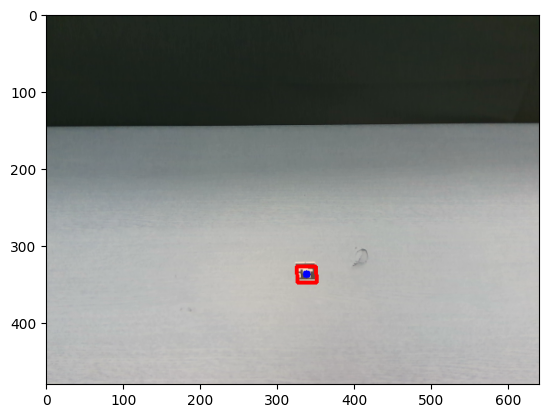

In [42]:
import matplotlib.pyplot as plt
import cv2 
import cv_bridge 
import apriltag 
import copy 
def draw_bbox(results, image, intrinsic_matrix, verbose_bbox=False, plot_img=True):
    width = 640
    height = 480

    for r in results:
        # extract the bounding box (x, y)-coordinates for the AprilTag
        # and convert each of the (x, y)-coordinate pairs to integers
        (ptA, ptB, ptC, ptD) = r.corners
        ptB = (int(ptB[0]), int(ptB[1]))
        ptC = (int(ptC[0]), int(ptC[1]))
        ptD = (int(ptD[0]), int(ptD[1]))
        ptA = (int(ptA[0]), int(ptA[1]))

        # draw the bounding box of the AprilTag detection
        cv2.line(image, ptA, ptB, (255, 0, 0), 3)
        cv2.line(image, ptB, ptC, (255, 0, 0), 3)
        cv2.line(image, ptC, ptD, (255, 0, 0), 3)
        cv2.line(image, ptD, ptA, (255, 0, 0), 3)

        # draw the center (x, y)-coordinates of the AprilTag
        (cX, cY) = (int(r.center[0]), int(r.center[1]))
        cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

        # draw the tag family on the image
        tagFamily = r.tag_family.decode("utf-8")
    
        if verbose_bbox:
            cv2.putText(image, tagFamily, (ptA[0], ptA[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 5.0, (255, 255, 255), 3)
            # print("Apriltag name: {}".format(tagFamily))

            x_centered = cX - width / 2
            y_centered = -1 * (cY - height / 2)

            cv2.putText(image, f"Center X coord: {x_centered}", (ptB[0] + 10, ptB[1] - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.5, (125, 0, 125), 7)

            cv2.putText(image, f"Center Y coord: {y_centered}", (ptB[0] + 10, ptB[1]),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, (125, 0, 125), 7)

            cv2.putText(image, f"Tag ID: {r.tag_id}", (ptC[0] - 70, ptC[1] - 15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (125, 0, 125), 7)

        # cv2.circle(image, (int((width / 2)), int((height / 2))), 5, (0, 0, 255), 2)
    if plot_img:
        plt.imshow(image)
        plt.show()

intrinsic_matrix = np.array([605.1119995117188, 0.0, 318.9336242675781, 0.0, 605.0845336914062, 237.35731506347656, 0.0, 0.0, 1.0])
cam_params = [intrinsic_matrix[0], intrinsic_matrix[4], intrinsic_matrix[2], intrinsic_matrix[5]]
detector = apriltag.Detector()



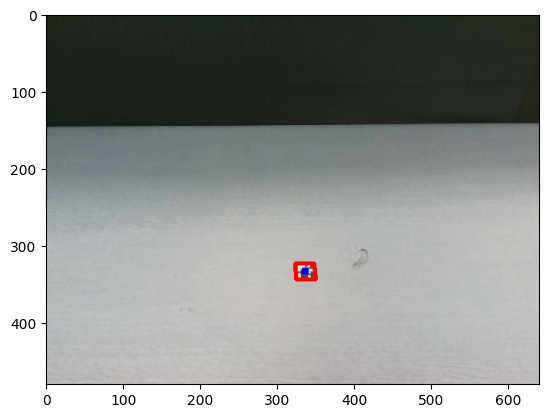

position:
 [0.02108057 0.11421922 0.71834111]
rotation:
 -45.327754260867714 -0.4303327865215293 -0.6336284514442854


In [45]:
color_img = cv2.imread("rot_0.png")
img_Gray = cv2.imread("rot_0.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    position = t2p(ht_mat)
    rotation = t2r(ht_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))

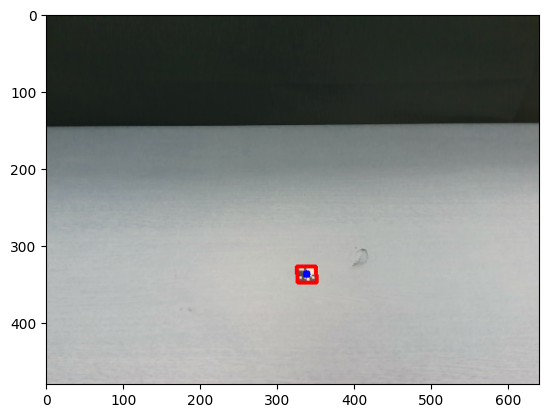

position:
 [0.02309406 0.1183599  0.71265256]
rotation:
 -3.122582086230591 42.796602538406184 88.27986954863404


In [44]:
color_img = cv2.imread("rot_90.png")
img_Gray = cv2.imread("rot_90.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    position = t2p(ht_mat)
    rotation = t2r(ht_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))

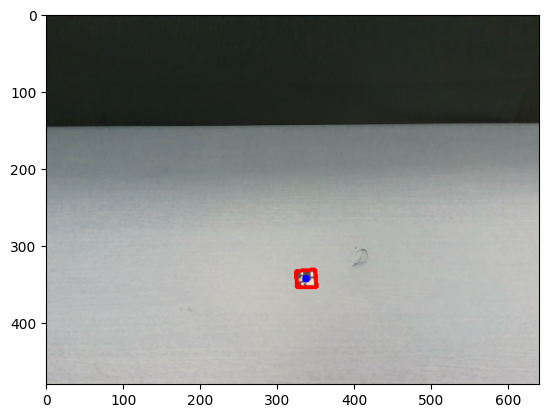

position:
 [0.02191991 0.12424267 0.71035594]
rotation:
 43.96420583838691 0.826757669883319 178.59266963091093


In [47]:
color_img = cv2.imread("rot_180.png")
img_Gray = cv2.imread("rot_180.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    position = t2p(ht_mat)
    rotation = t2r(ht_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))

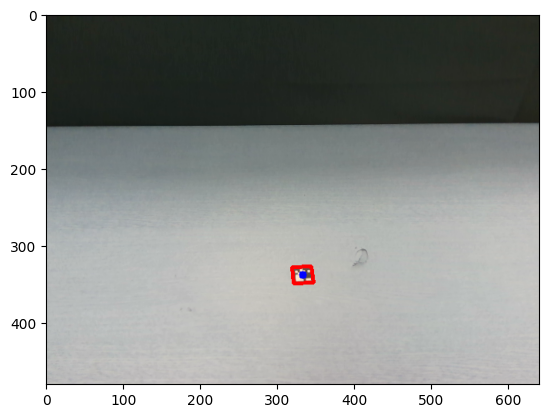

position:
 [0.01715041 0.11825313 0.71025086]
rotation:
 5.3621630047695135 -44.86190805005675 -96.21519104375409


In [48]:
color_img = cv2.imread("rot_270.png")
img_Gray = cv2.imread("rot_270.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    position = t2p(ht_mat)
    rotation = t2r(ht_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))

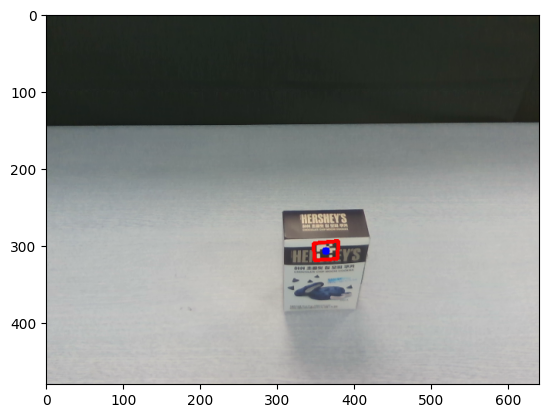

position:
 [0.04254556 0.06681999 0.57528434]
rotation:
 38.37080942129338 -1.7349687762663757 -4.511087750486509


In [54]:
color_img = cv2.imread("snack_0.png")
img_Gray = cv2.imread("snack_0.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    position = t2p(ht_mat)
    rotation = t2r(ht_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))

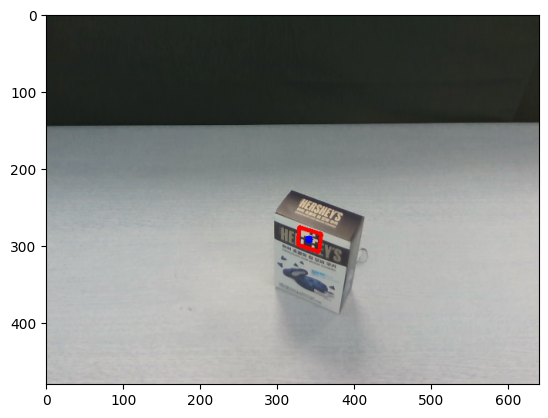

position:
 [0.0225208  0.05452844 0.59581198]
rotation:
 39.13173425514795 18.62370393119844 16.920760264871433


In [56]:
color_img = cv2.imread("snack_20.png")
img_Gray = cv2.imread("snack_20.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    position = t2p(ht_mat)
    rotation = t2r(ht_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))

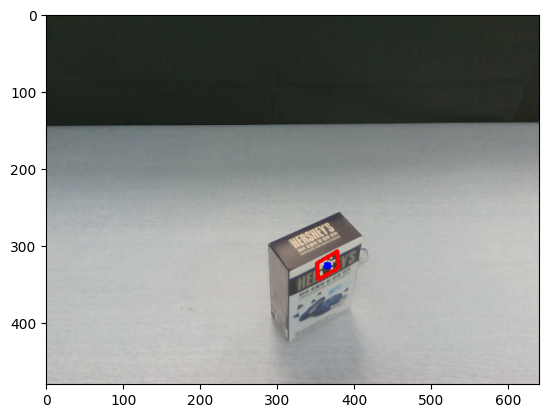

transform_mat:
 [[ 7.07106781e-01  0.00000000e+00 -7.07106781e-01  4.54000000e-01]
 [ 8.65956056e-17 -1.00000000e+00  8.65956056e-17  0.00000000e+00]
 [-7.07106781e-01 -1.22464680e-16 -7.07106781e-01  1.30000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
rotation:
 [[ 0.84342176  0.0947973  -0.52882247]
 [-0.40928534  0.7510068  -0.51814505]
 [ 0.34803052  0.6534541   0.67221462]]
position:
 [0.04323746 0.0820618  0.55736389]
rotation:
 44.189219049771545 -20.366900300241557 -25.88580127463296


In [58]:
color_img = cv2.imread("snack_-20.png")
img_Gray = cv2.imread("snack_-20.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    position = t2p(ht_mat)
    rotation = t2r(ht_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))


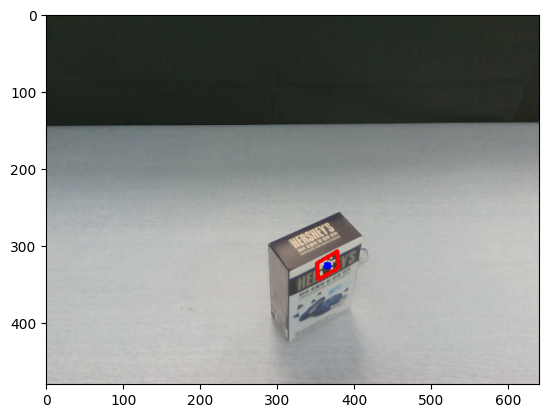

transform_mat:
 [[ 7.07106781e-01  0.00000000e+00 -7.07106781e-01  4.54000000e-01]
 [ 8.65956056e-17 -1.00000000e+00  8.65956056e-17  0.00000000e+00]
 [-7.07106781e-01 -1.22464680e-16 -7.07106781e-01  1.30000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
position:
 [ 0.09045772 -0.0820618   0.87531071]
rotation:
 -100.84842784110127 57.40335978731951 49.440817082330675


In [59]:
color_img = cv2.imread("snack_-20.png")
img_Gray = cv2.imread("snack_-20.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

# Calibration
rotation_x   = Rotation_X(-math.pi)
rotation_y   = Rotation_Y(-math.pi/4)
rotation_mat = np.dot(rotation_x, rotation_y)
position_mat = Translation(0.454,0,1.3)
transform_mat= HT_matrix(rotation_mat, position_mat)
print("transform_mat:\n", transform_mat)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    calib_mat = np.dot(transform_mat, ht_mat)
    position = t2p(calib_mat)
    rotation = t2r(calib_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))


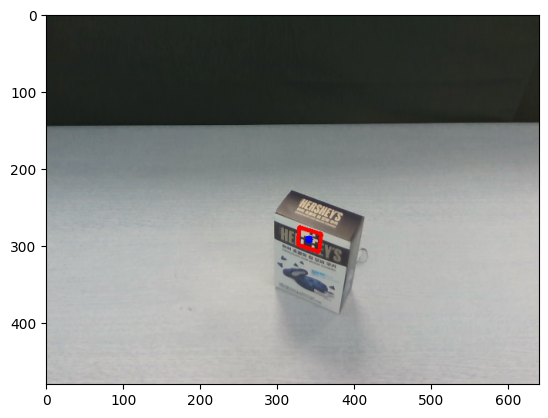

transform_mat:
 [[ 7.07106781e-01  0.00000000e+00 -7.07106781e-01  4.54000000e-01]
 [ 8.65956056e-17 -1.00000000e+00  8.65956056e-17  0.00000000e+00]
 [-7.07106781e-01 -1.22464680e-16 -7.07106781e-01  1.30000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
position:
 [ 0.04862191 -0.05452844  0.8627727 ]
rotation:
 -153.94349002554034 24.535413482543493 -17.648978810544833


In [60]:
color_img = cv2.imread("snack_20.png")
img_Gray = cv2.imread("snack_20.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

# Calibration
rotation_x   = Rotation_X(-math.pi)
rotation_y   = Rotation_Y(-math.pi/4)
rotation_mat = np.dot(rotation_x, rotation_y)
position_mat = Translation(0.454,0,1.3)
transform_mat= HT_matrix(rotation_mat, position_mat)
print("transform_mat:\n", transform_mat)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    calib_mat = np.dot(transform_mat, ht_mat)
    position = t2p(calib_mat)
    rotation = t2r(calib_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))


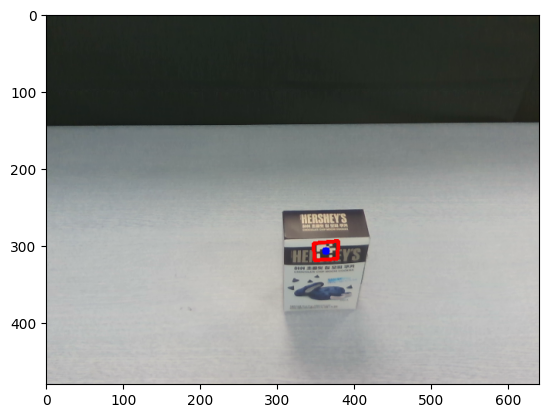

transform_mat:
 [[ 7.07106781e-01  0.00000000e+00 -7.07106781e-01  4.54000000e-01]
 [ 8.65956056e-17 -1.00000000e+00  8.65956056e-17  0.00000000e+00]
 [-7.07106781e-01 -1.22464680e-16 -7.07106781e-01  1.30000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
position:
 [ 0.07729679 -0.06681999  0.86312829]
rotation:
 -136.99047790116205 46.55223899760226 6.564313215059156


In [61]:
color_img = cv2.imread("snack_0.png")
img_Gray = cv2.imread("snack_0.png", cv2.IMREAD_GRAYSCALE)
results = detector.detect(img_Gray)
draw_bbox(results, color_img, intrinsic_matrix=intrinsic_matrix, verbose_bbox=False, plot_img=True)

# Calibration
rotation_x   = Rotation_X(-math.pi)
rotation_y   = Rotation_Y(-math.pi/4)
rotation_mat = np.dot(rotation_x, rotation_y)
position_mat = Translation(0.454,0,1.3)
transform_mat= HT_matrix(rotation_mat, position_mat)
print("transform_mat:\n", transform_mat)

for i in range(len(results)):
    ht_mat, e0, e1 = detector.detection_pose(detection=results[i], camera_params=cam_params, tag_size=0.03)   
    calib_mat = np.dot(transform_mat, ht_mat)
    position = t2p(calib_mat)
    rotation = t2r(calib_mat)
    print("position:\n", position)
    print("rotation:\n", np.rad2deg(r2rpy(rotation)[0]), np.rad2deg(r2rpy(rotation)[1]), np.rad2deg(r2rpy(rotation)[2]))
